In [13]:
import numpy as np
import matplotlib.pyplot as plt
print('done importing packages')

done importing packages


In [14]:
# Define constants
M = 72.0          # Mass of the object (kg)
rho = 1.225       # Air density (kg/m^3)
Cd = 0.282        # Drag coefficient
A = 1             # Cross-sectional area (m^2)
sigma = 0.004     # Damping coefficient (set to 0 for this example)
g = 9.81          # Acceleration due to gravity (m/s^2)
tb = 2.2          # Time when T(t) is nonzero (s)
print('done setting parameters')

done setting parameters


In [15]:
# Define the throwing and pedaling functions T(t) and P(t)
def T(t):
    return 100.0 if t == tb else 0.0

def P(t):
    return 72.0 if t < tb else 0.0

print('throwing and pedaling functions defined')

throwing and pedaling functions defined


In [16]:
# Define the ODE as a system of first-order ODEs
def system(y, t):
    x, x_dot = y
    x_double_dot = (T(t) - 0.5 * rho * Cd * A * x_dot**2 - sigma * g * M + P(t)) / M
    return [x_dot, x_double_dot]

# Initial conditions
x0 = -50.0
x_dot0 = 20.0

# Time span
t_span = np.linspace(0.0, 5.0, 1000)  # Adjust the time span as needed
dt = t_span[1] - t_span[0]

# Initialize arrays to store values
x_values = np.zeros(len(t_span))
x_dot_values = np.zeros(len(t_span))

# Set initial conditions
x_values[0] = x0
x_dot_values[0] = x_dot0

print('done defining the problem')

done defining the problem


In [17]:
# Solve the ODE
for i in range(1, len(t_span)):
    t = t_span[i]
    x_dot = x_dot_values[i - 1]
    x_double_dot = (T(t) - 0.5 * rho * Cd * A * x_dot**2 - sigma * g * M + P(t)) / M
    x_dot_new = x_dot + x_double_dot * dt
    x_new = x_values[i - 1] + x_dot_new * dt

    x_values[i] = x_new
    x_dot_values[i] = x_dot_new

# Displacement and velocity for the cyclist that continued pedaling
def x_const(t):
    return x0 + x_dot0*t

def v_const(t):
    return x_dot0

t_plot = np.linspace(tb-0.3, 3.0, 100)
x_plot = np.interp(t_plot, t_span, x_values)
v_plot = np.interp(t_plot, t_span, x_dot_values)

x_const_values = [x_const(t) for t in t_plot]
v_const_values = [v_const(t) for t in t_plot]

print('done solving the problem')

done solving the problem


In [18]:
zero_indices = np.where(np.diff(np.sign(x_values)))[0]
print(zero_indices)
print(t_span[zero_indices])

[499]
[2.4974975]


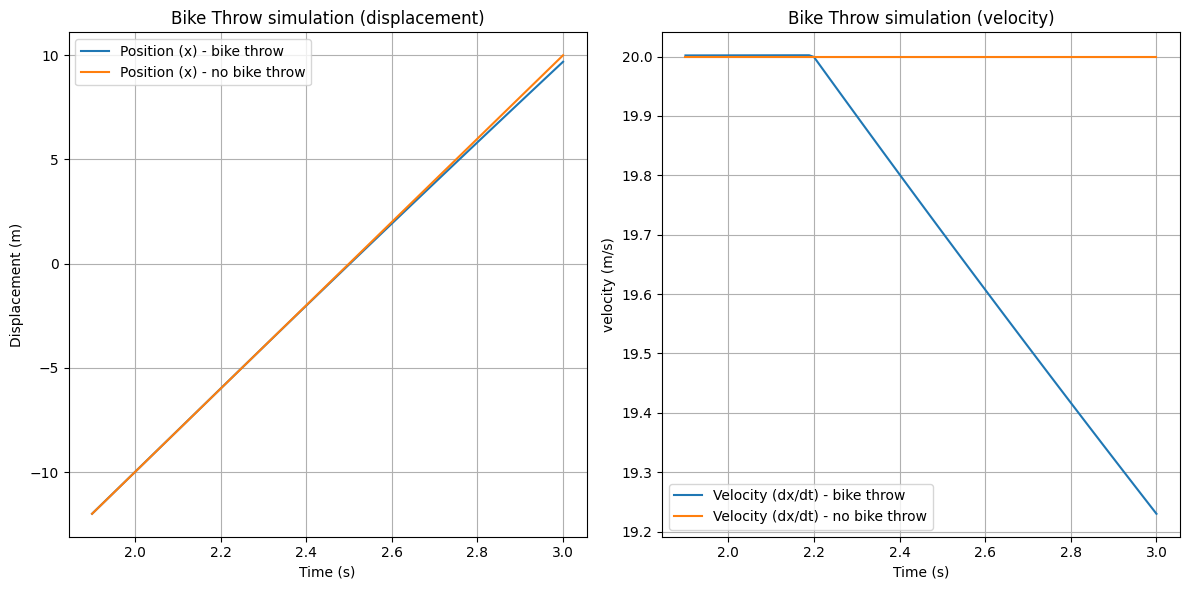

In [19]:
# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t_plot, x_plot, label='Position (x) - bike throw')
plt.plot(t_plot, x_const_values, label = 'Position (x) - no bike throw')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Bike Throw simulation (displacement)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t_plot, v_plot, label='Velocity (dx/dt) - bike throw')
plt.plot(t_plot, v_const_values, label='Velocity (dx/dt) - no bike throw')
plt.xlabel('Time (s)')
plt.ylabel('velocity (m/s)')
plt.title('Bike Throw simulation (velocity)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

